1. matplotlib实际上是一种比较低级的工具,需手动组装一些基本组件：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息  
2. Seaborn简化了许多常见可视类型的创建

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### seaborn绘图大小, 间隔

<IPython.core.display.Javascript object>


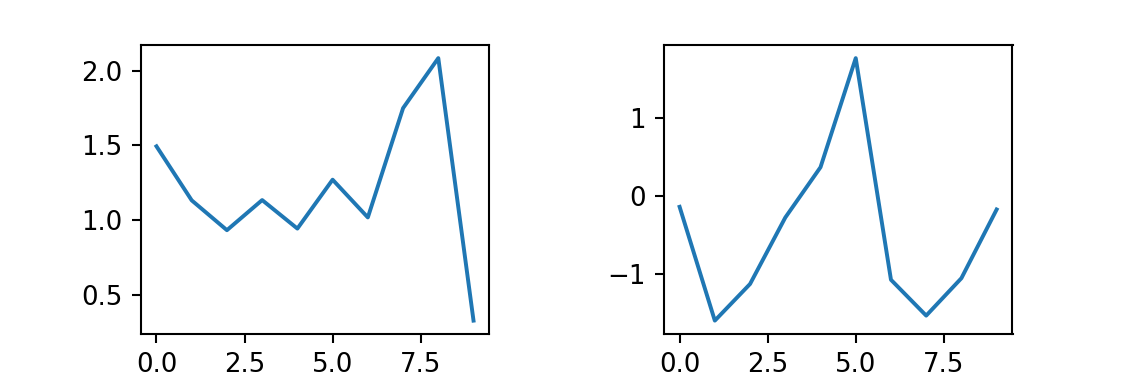

In [16]:
%matplotlib notebook
# 设置子图排列方式
f,axes = plt.subplots(1,2,figsize=(6,2))
# 设置子图间隔
plt.subplots_adjust(wspace=0.5,hspace=0)
pd.Series(np.random.randn(10).cumsum()).plot(ax=axes[0])
pd.Series(np.random.randn(10).cumsum()).plot(ax=axes[1])

### Series与DataFrame绘图
1. Series和DataFrame都有一个用于生成各类图表的plot方法。  
 默认情况下，它们所生成的是线型图  
 Series的索引作为x轴  
2. DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例

<IPython.core.display.Javascript object>


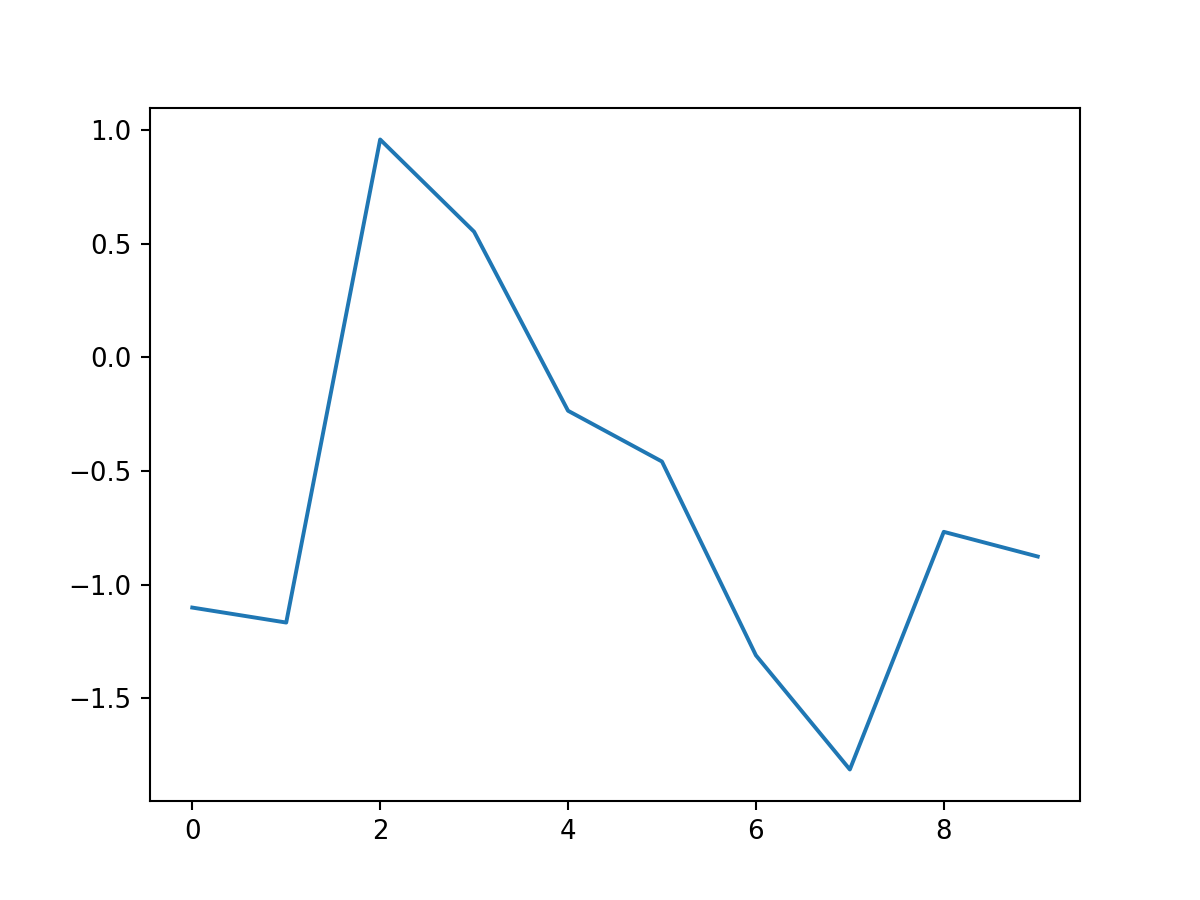

In [17]:
obj = pd.Series(np.random.randn(10).cumsum())
obj.plot()

<IPython.core.display.Javascript object>


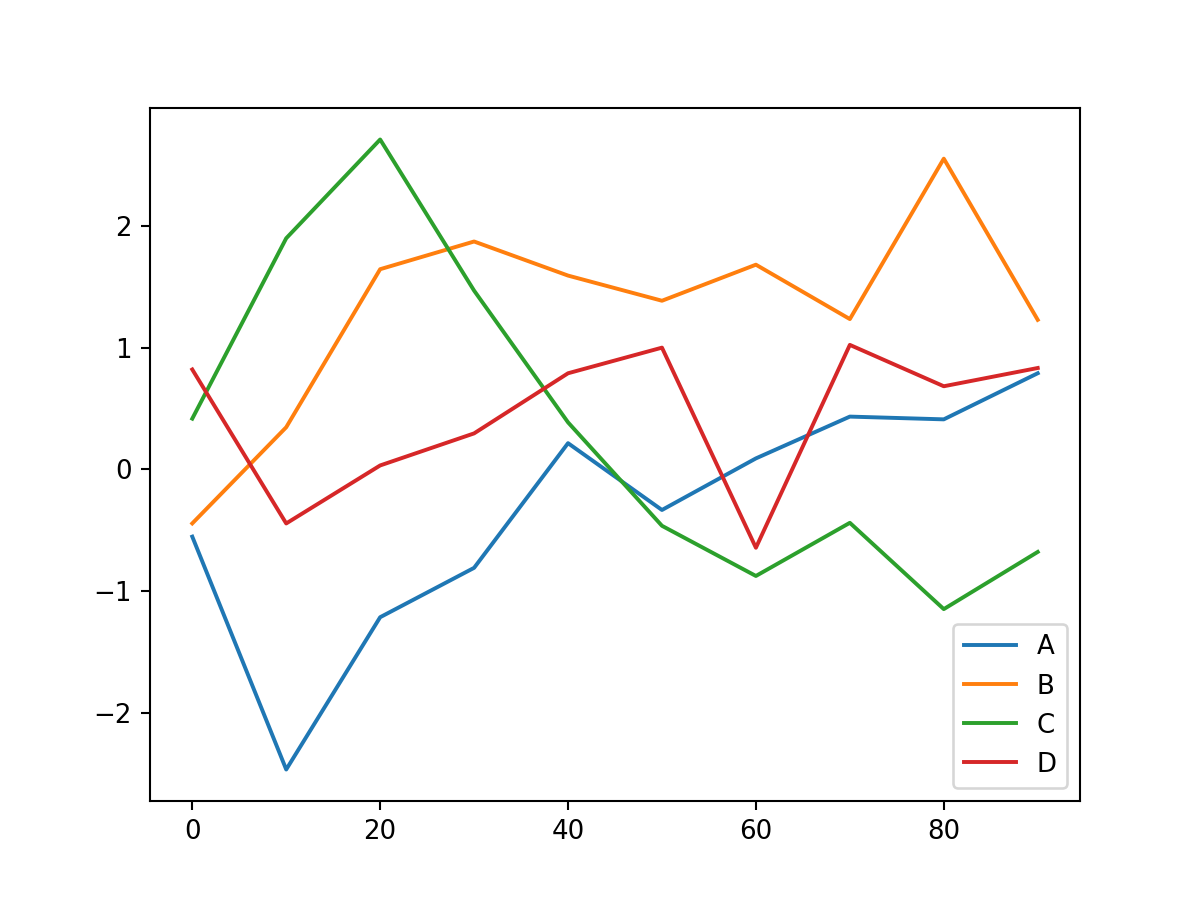

In [18]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df.plot()

### Pandas绘制柱图
1. 数据额结构.plot().bar()/barh(), 分别绘制垂直或水平的柱图
2. Series的柱状图, 柱的高度为元素值
3. DataFrame的柱状图, 分成几堆. 每堆对应index值. 堆内的几个柱对应每个column  
 参数stacked=True, 设置柱图堆叠
 
4. 柱状图有一个不错的用法: 用Series.value_counts()

<IPython.core.display.Javascript object>


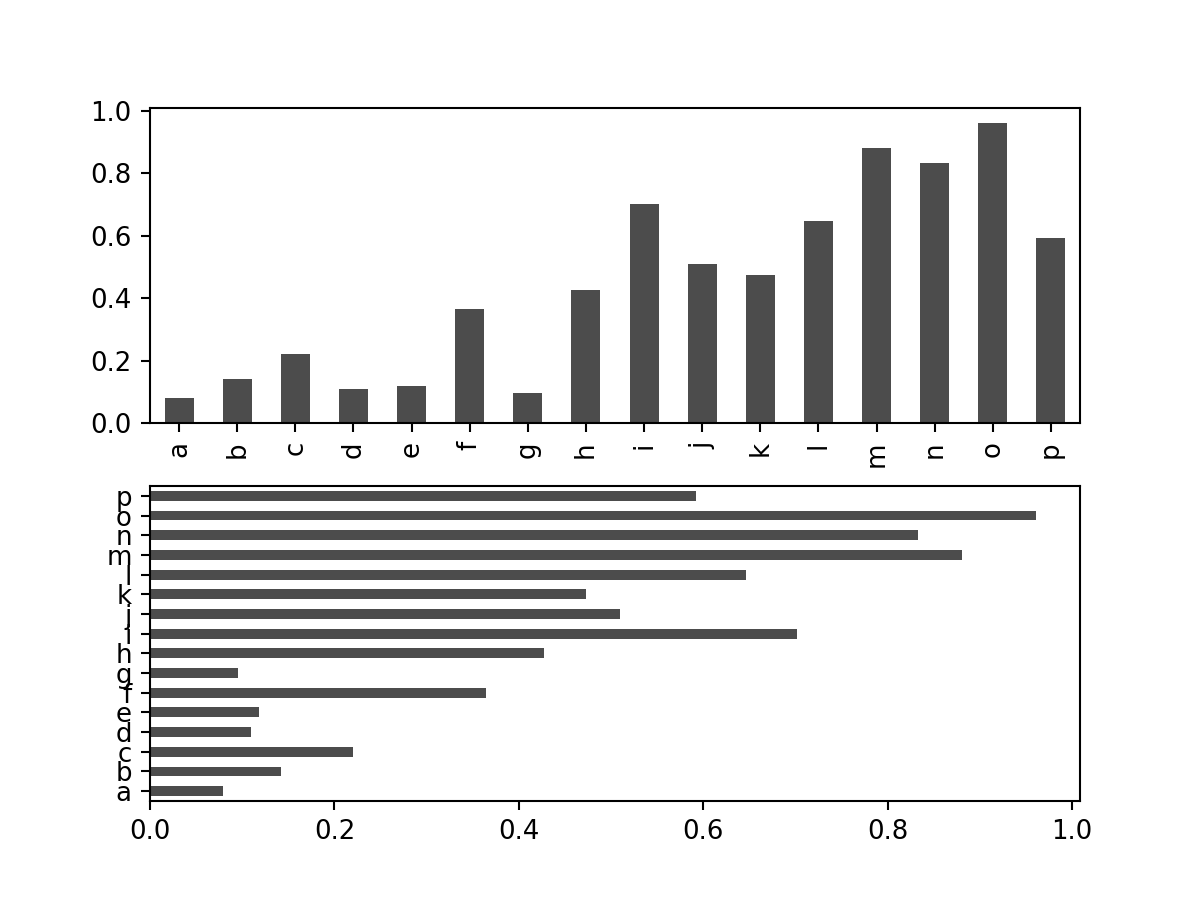

In [19]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<IPython.core.display.Javascript object>


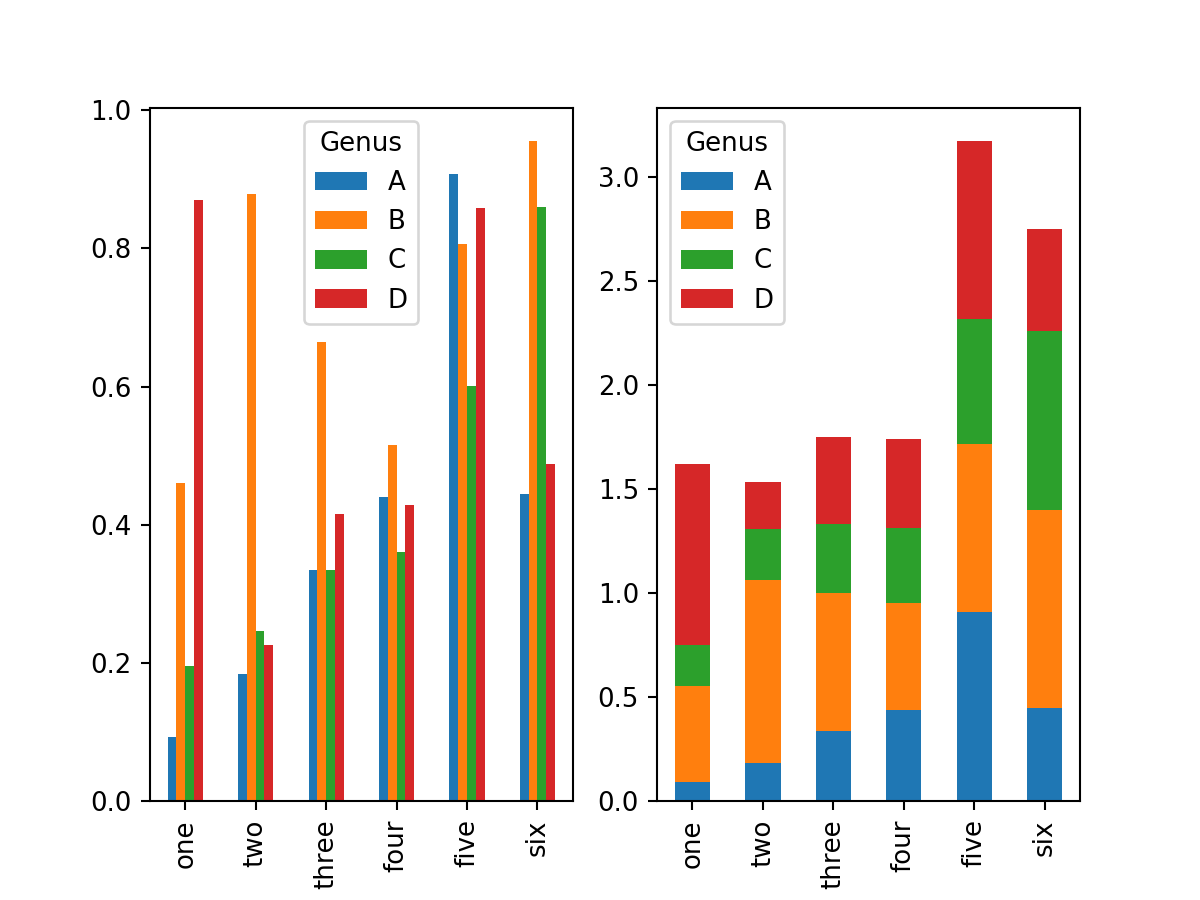

In [20]:
# DataFrame的柱状图
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

fig,axes = plt.subplots(1,2)
df.plot.bar(ax=axes[0])
df.plot.bar(stacked=True,ax=axes[1])

In [21]:
## 根据百分比绘制柱图
tips = pd.read_csv('../example/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [22]:
# 'day'取值为index,'size'取值为column, 统计这样的值组合有多少个, 形成一个交叉表
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [23]:
# 规格化, 计算每个值栈各行的百分比 
print party_counts.sum(axis=1)
# DataFrame.div(series,axis=n): Series的index匹配DataFrame的那个轴上的索引, 从而计算除法
party_pcts = party_counts.div(party_counts.sum(axis=1),axis=0) 
party_pcts

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64


size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


<IPython.core.display.Javascript object>


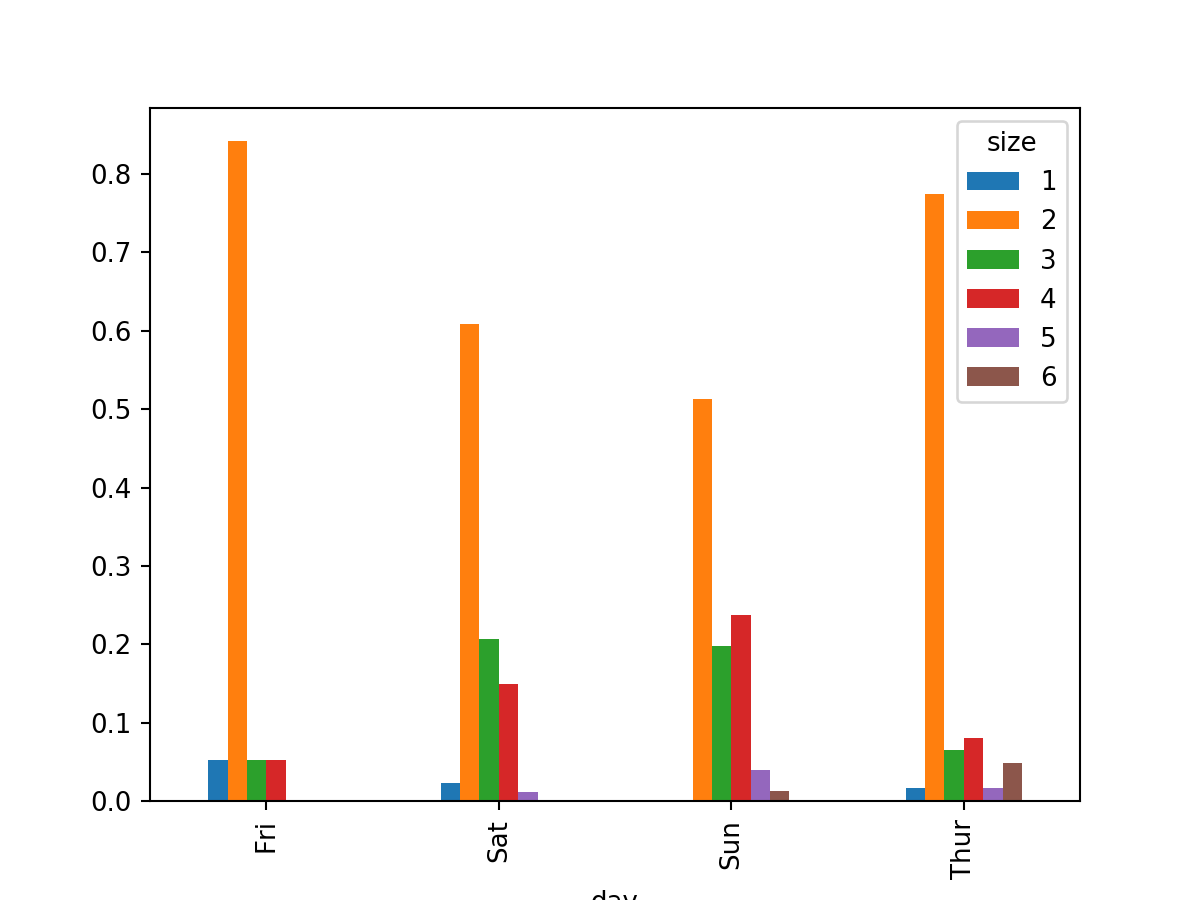

In [24]:
party_pcts.plot.bar()

### Seaborn绘制柱图
1. Seaborn绘制DataFrame的柱图:  
 指定x轴显示的columnIdx和y轴显示的columnIdx  
 `Seaborn.barplot(x='x_axis_index',y='y_axis_index',data=DataFrame)`

   digit  number
0      0       6
1      3       5
2      1       4
3      2       3
4      4       2


<IPython.core.display.Javascript object>


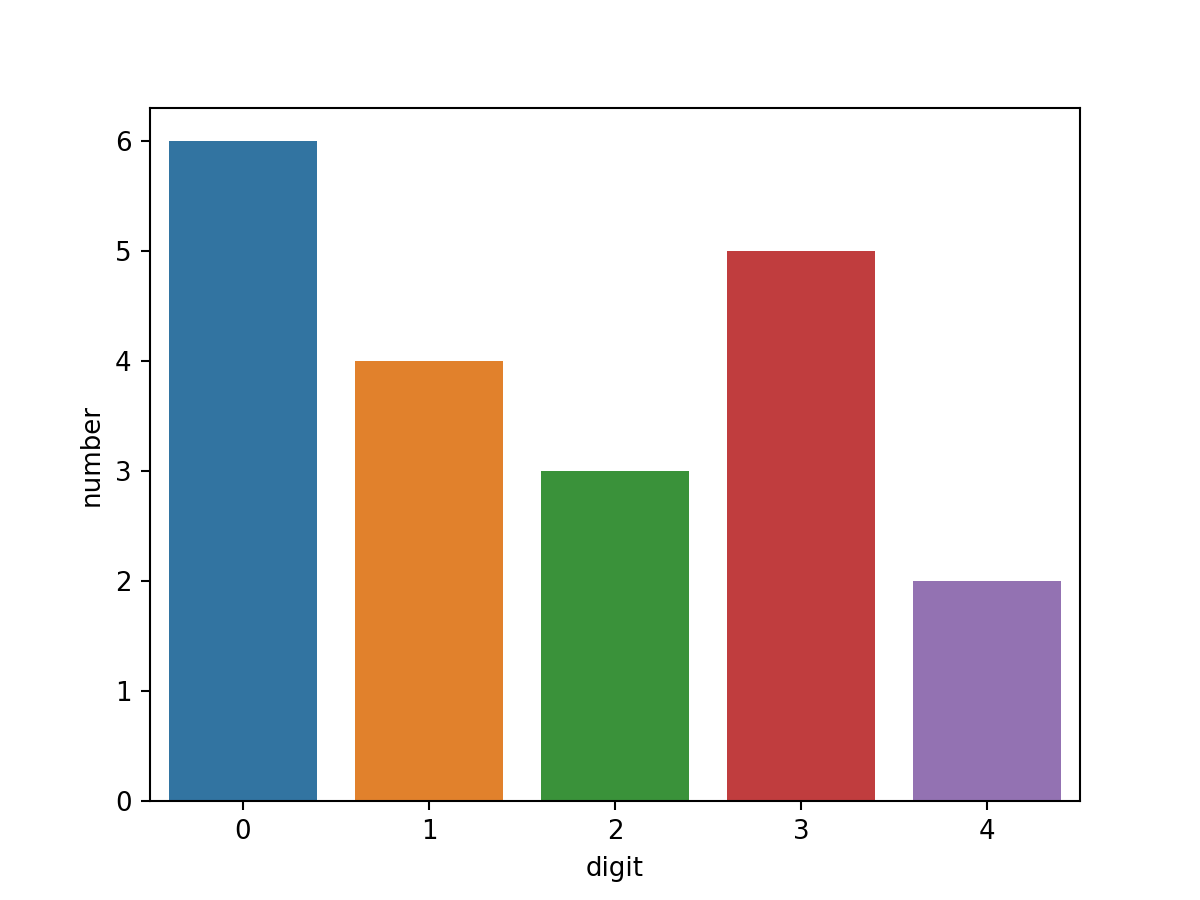

In [28]:
import seaborn as sbn
obj = pd.Series(np.random.randint(0,5,20))
df = obj.value_counts().reset_index()
df.columns = pd.Index(['digit','number'])
print df
sbn.barplot(x='digit',y='number',data=df)

### 直方图和密度图
1. 直方图  
 直方图是一种对值频率(值占比)进行离散化显示的柱状图.  
 本质上还是一个柱状图, 只是送给柱状图的数据, 为该数值占总体的一个百分比. 即数据的取值范围在0到1  
 因此, Series可以通过指定参数bins=50(均分成50个面元), 来直接绘制直方图. 从而简化上述先计算百分比, 再绘制柱图的步骤
 
2. 密度图  
 一个Series是一个观测出的样本点, 用这些样本点估计出一个概率密度函数, 画出这个函数的曲线即为密度曲线  
 `Series.plot.density()`

### seaborn直接绘制直方图和概率密度图  
 Seaborn.distplot(Series,bins=#bin): 均分成#bin个面元, 绘制直方图和概率密度图

<IPython.core.display.Javascript object>


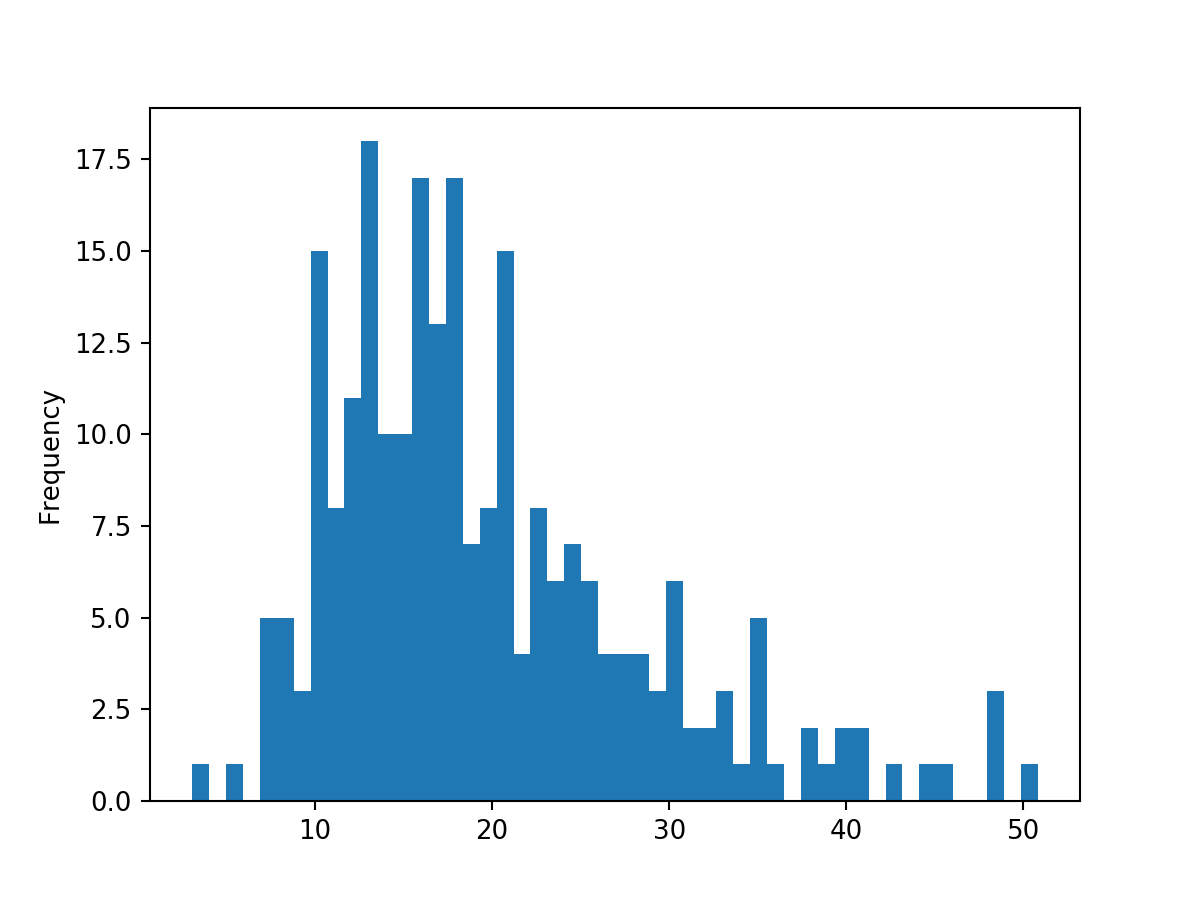

In [29]:
# hist绘制直方图
tips['total_bill'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


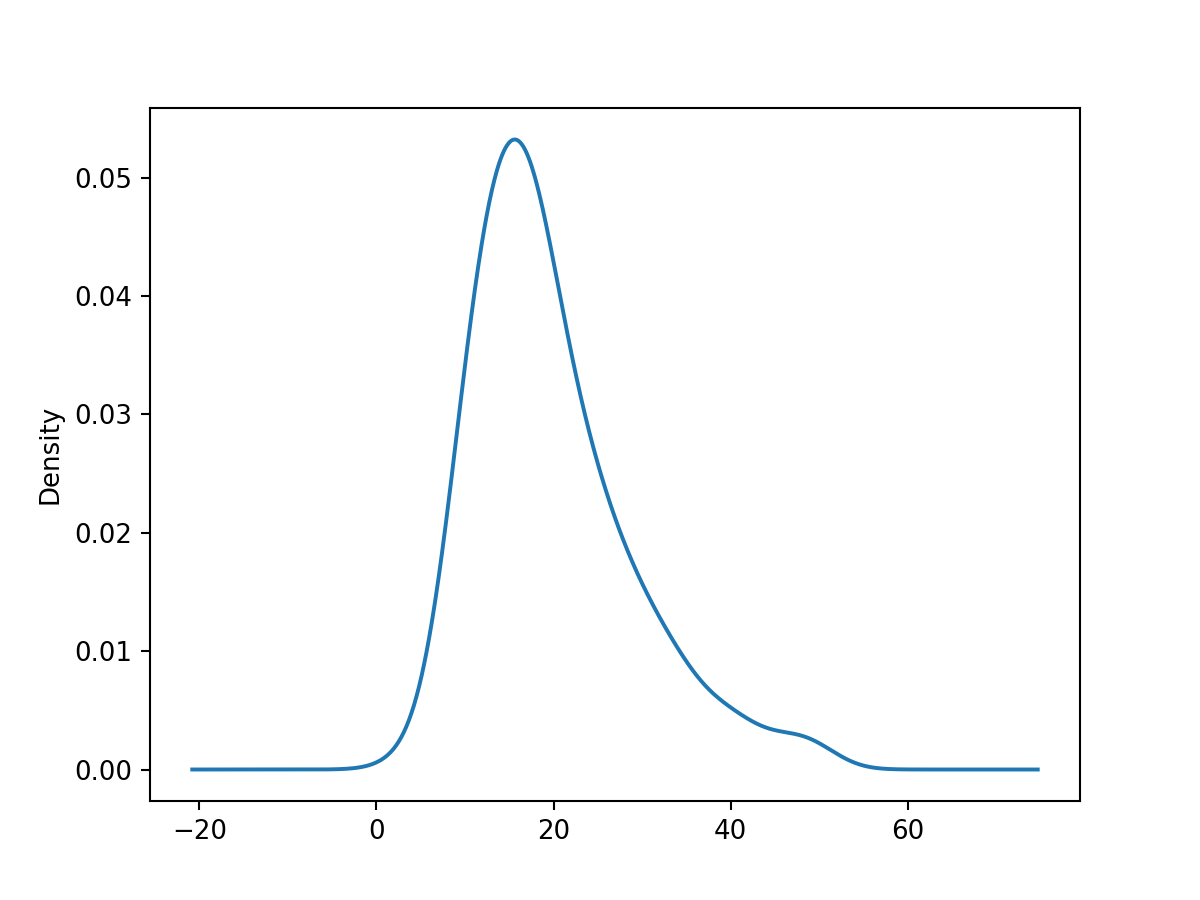

In [30]:
#密度图
tips['total_bill'].plot.density()

<IPython.core.display.Javascript object>


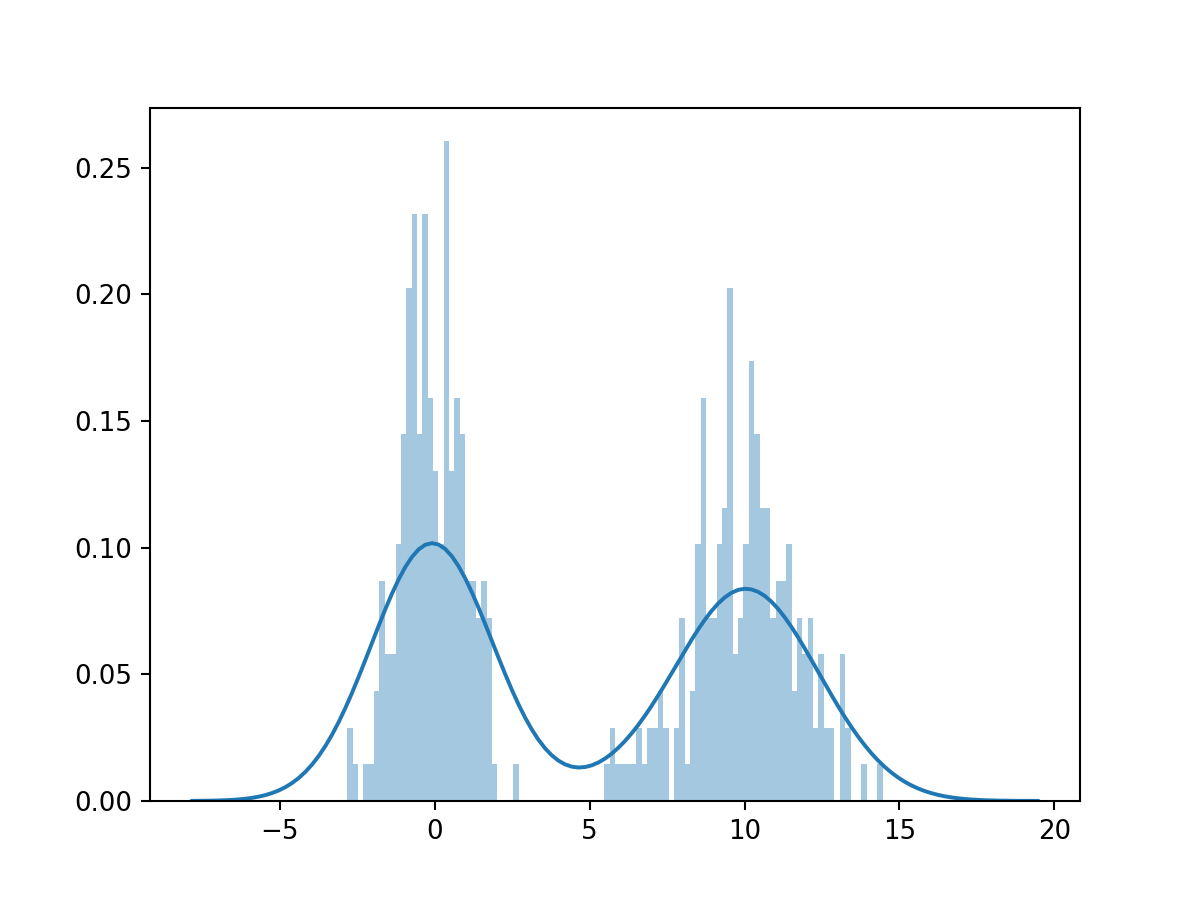

In [34]:
import seaborn as sbn
# 生成2个正态分布的样本
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
sbn.distplot(values,bins=100)

### 点图
1. Seaborn绘制散点图, 并加上一条回归直线 (regression plot)   
 Seaborn.regplot(x='columnIdx',y='columnIdx',data=Dataframe)
2. 在探索数据分布时, 同时观察单个feature的分布, 和任意两个feature联合的柱形图/联合的散点图 是很有意义的  
 seaborn提供了pairplot方法, 绘制散点图矩阵.  
 eg: seaborn.pairplot(data,diag_kind='kde') : 声明对角线为单个feature的概率分布, 其他位置为联合散点图

In [76]:
df = pd.read_csv('../example/macrodata.csv')
df = df.loc[:,['cpi', 'm1', 'tbilrate', 'unemp']]
# DataFrame.diff() : DataFrame每个元素, 和所在列的上一行对应位置的差
data = np.log(df).diff().dropna()
data.head(5)

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


<IPython.core.display.Javascript object>


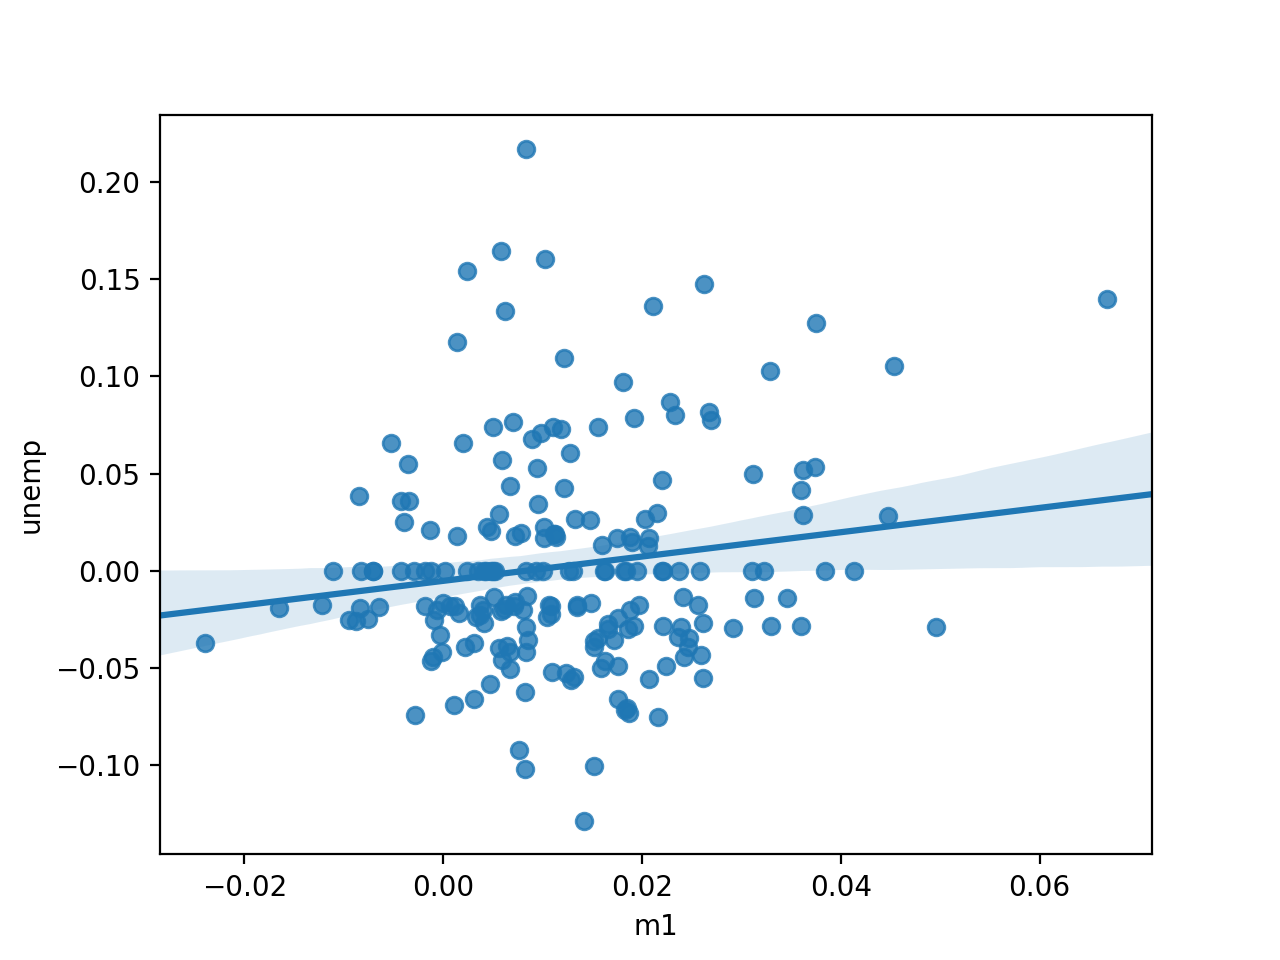

In [77]:
# seaborn绘制散点图+回归直线
import seaborn as snb
snb.regplot(x='m1',y='unemp',data=data)

<IPython.core.display.Javascript object>


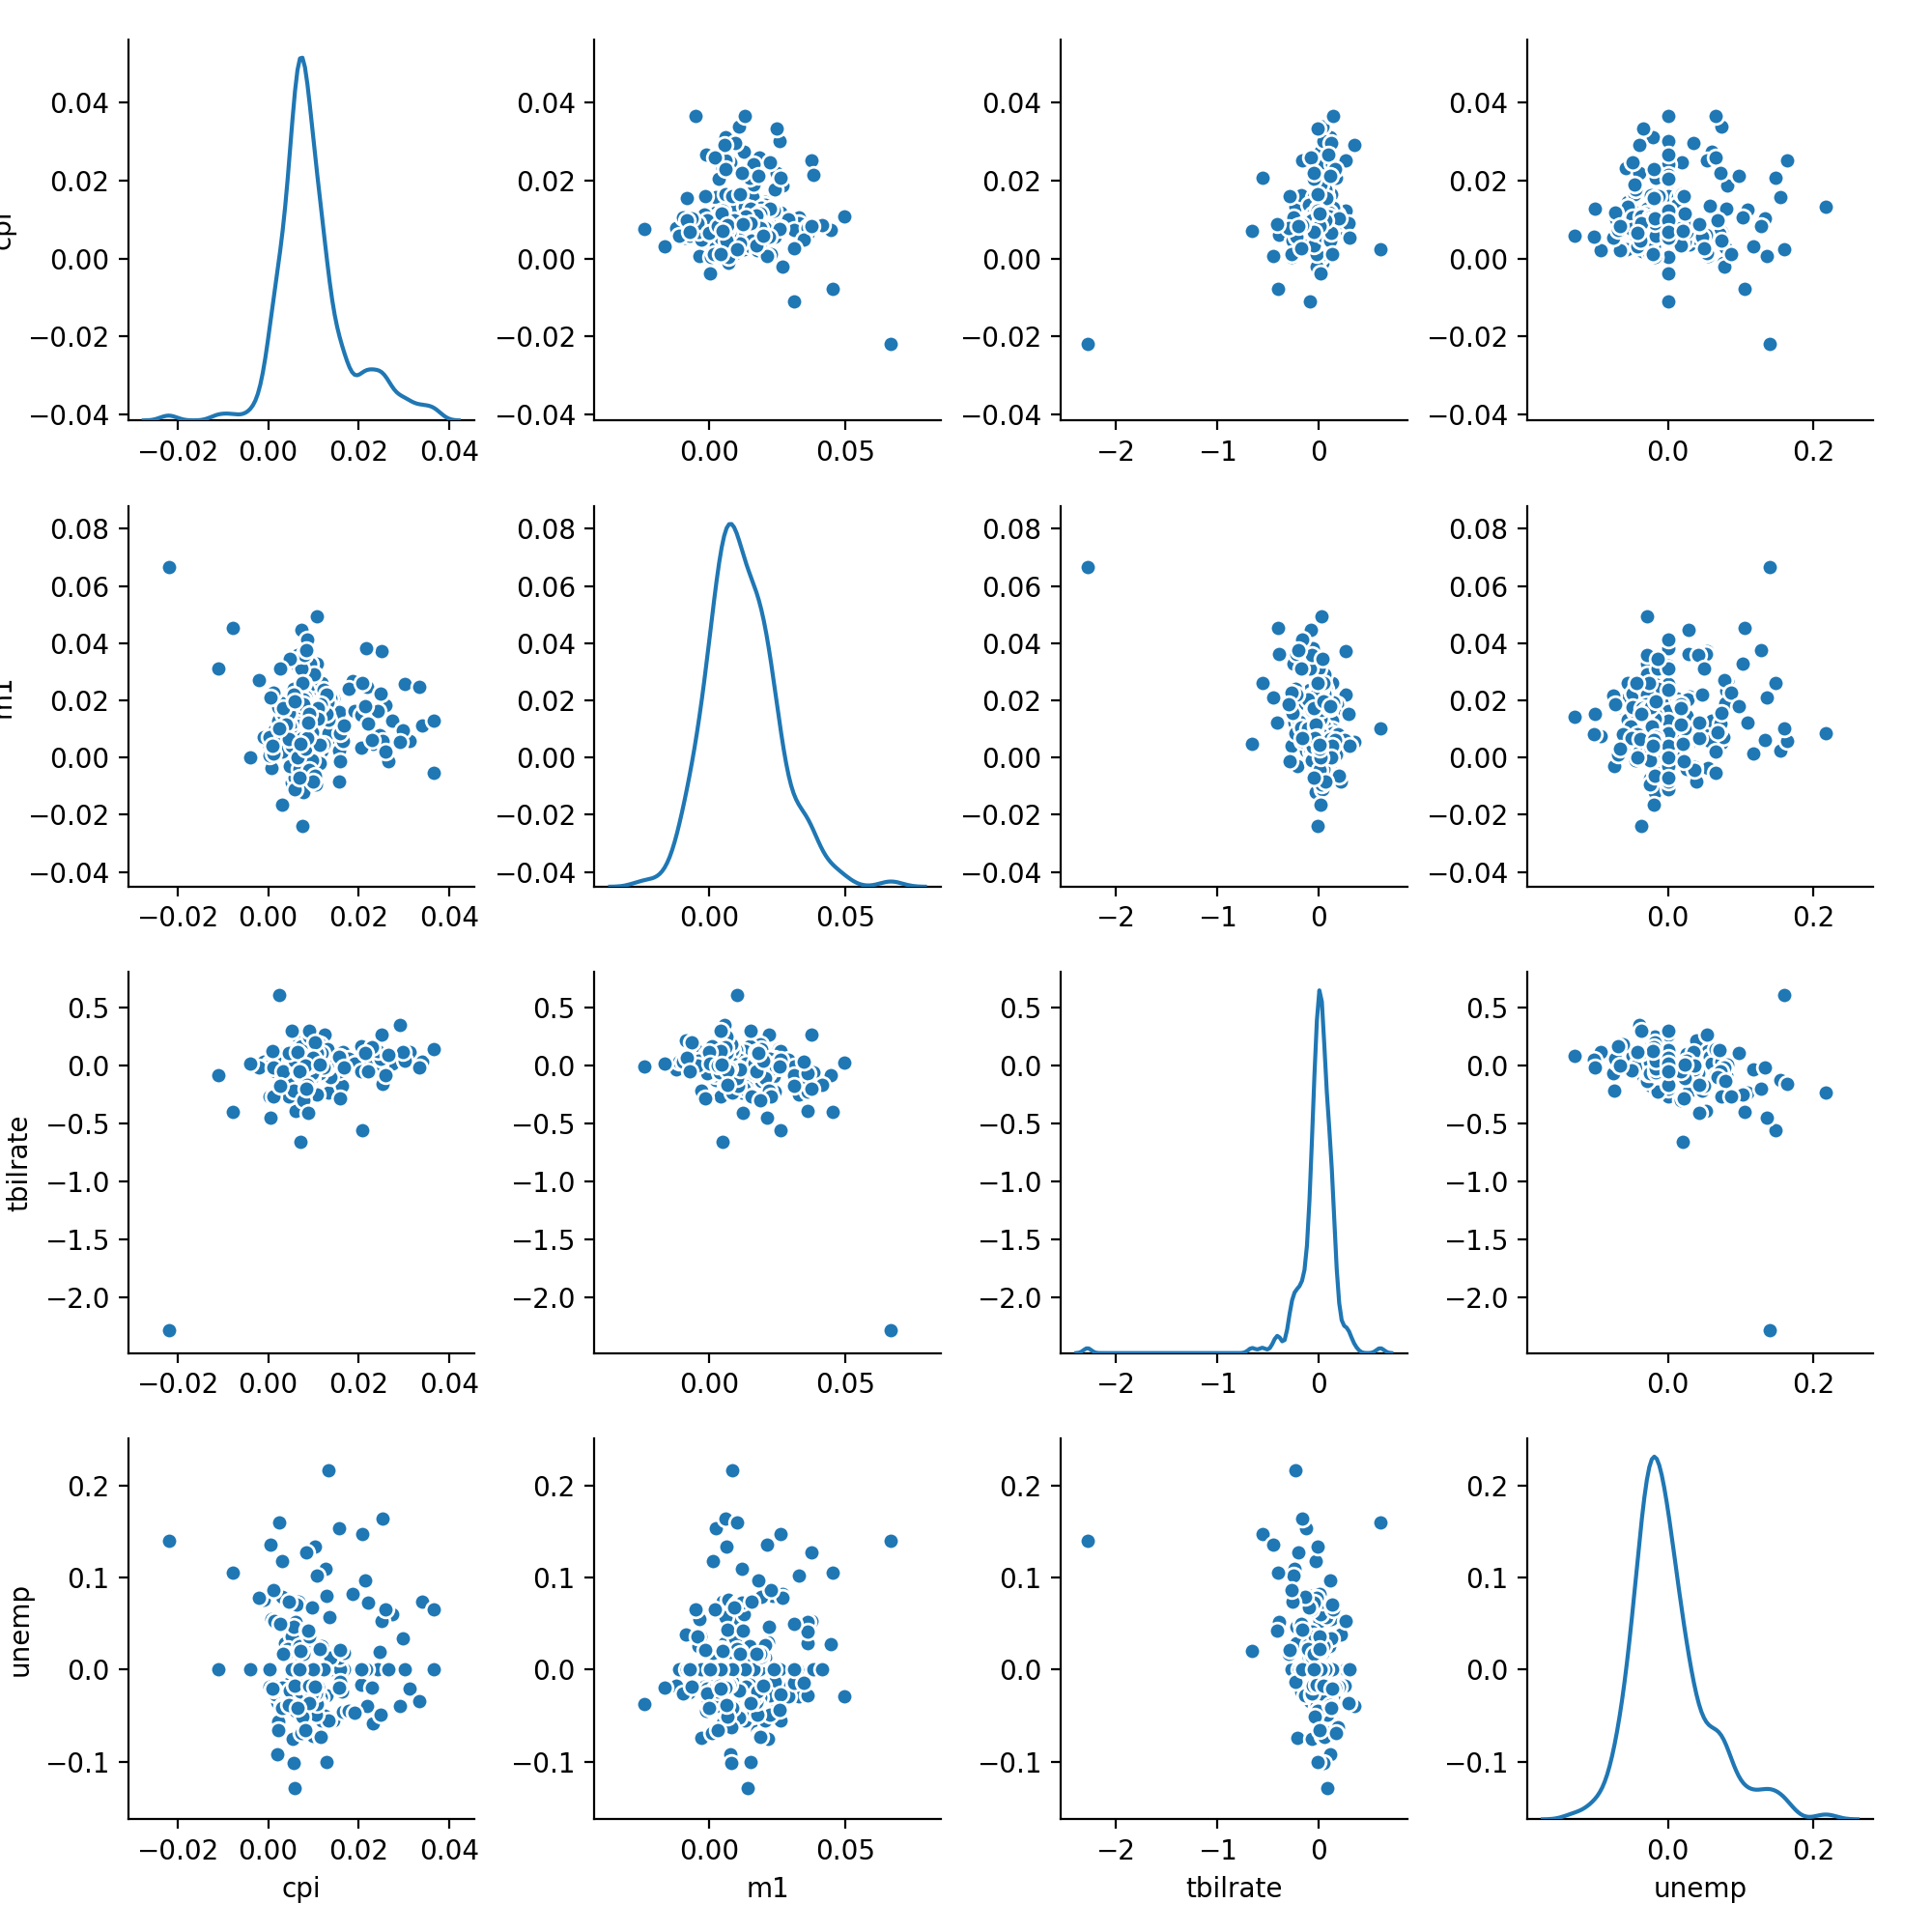

In [81]:
sbn.pairplot(data,diag_kind='kde')